https://fenicsproject.discourse.group/t/solve-1d-poiseuille-flow-defining-the-total-flow-rate/6754

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Solving linear variational problem.
Pressure gradient - Analytical: -24.0000 Numerical: -24.0024


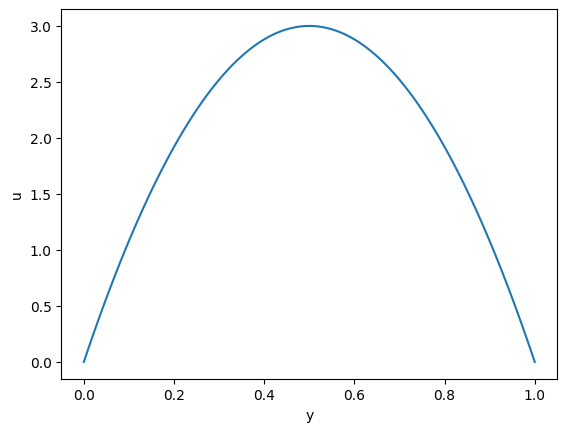

In [1]:
from fenics import *
import matplotlib.pyplot as plt

U = 2.0
mu = 1.0
H = 1.0

mesh = IntervalMesh(100, 0.0, H)
V = FiniteElement('CG', mesh.ufl_cell(), 1)
R = FiniteElement('R', mesh.ufl_cell(), 0)
W = FunctionSpace(mesh, MixedElement([V, R]))

bc = DirichletBC(W.sub(0), Constant(0.0), "on_boundary")

u, c = TrialFunctions(W)
v, d = TestFunctions(W)

F1 = dot(mu*grad(u), grad(v))*dx + v*c*dx
F2 = d*(u - U)*dx
F = F1 + F2
a, L = lhs(F), rhs(F)
w = Function(W)
solve(a == L, w, bc)
u, c = w.split()

print("Pressure gradient - Analytical: %.4f Numerical: %.4f" % (-12.0*U*mu/(H**2),c(0.5)))

plot(u)
plt.ylabel("u")
plt.xlabel("y")
plt.show()

In [2]:
from fenics import *
import matplotlib.pyplot as plt

U = 2.0
mu = 1.0
H = 1.0

mesh = IntervalMesh(100, 0.0, H)
V = FiniteElement('CG', mesh.ufl_cell(), 1)
# R = FiniteElement('R', mesh.ufl_cell(), 0)
# W = FunctionSpace(mesh, MixedElement([V, R]))

# bc = DirichletBC(W.sub(0), Constant(0.0), "on_boundary")

W = FunctionSpace(mesh, 'CG', 1)

Unknown finite element "<CG1 on a interval>".


UFLException: Unknown finite element "<CG1 on a interval>".

In [ ]:

bc = DirichletBC(W, Constant(0.0), "on_boundary")


u, c = TrialFunctions(W)
v, d = TestFunctions(W)

F1 = dot(mu*grad(u), grad(v))*dx + v*c*dx
F2 = d*(u - U)*dx
F = F1 + F2
a, L = lhs(F), rhs(F)
w = Function(W)
solve(a == L, w, bc)
u, c = w.split()